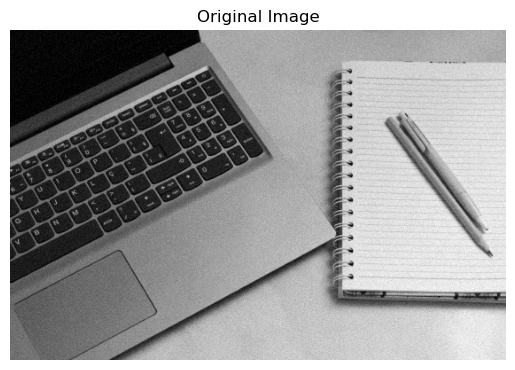

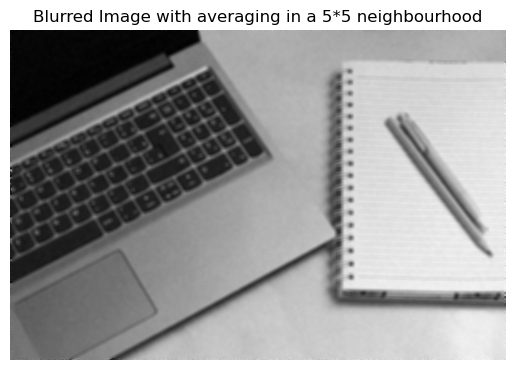

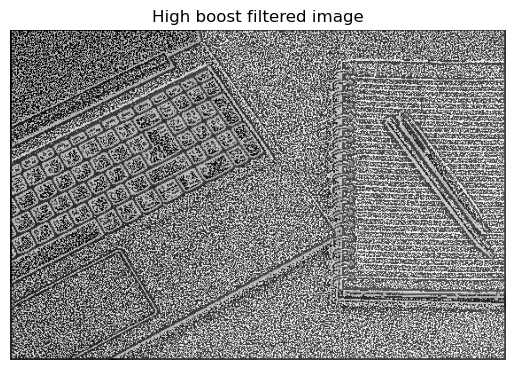

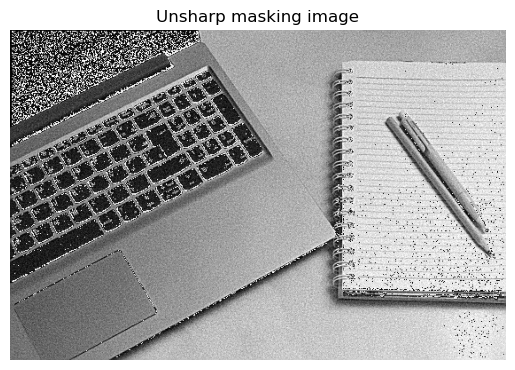

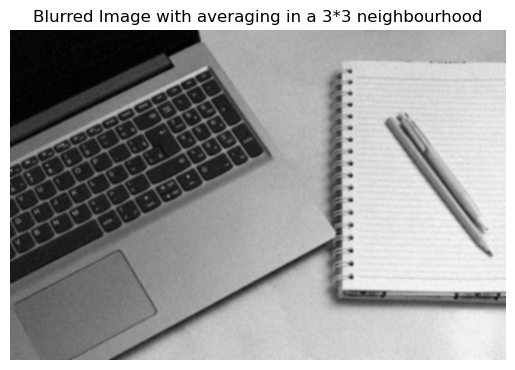

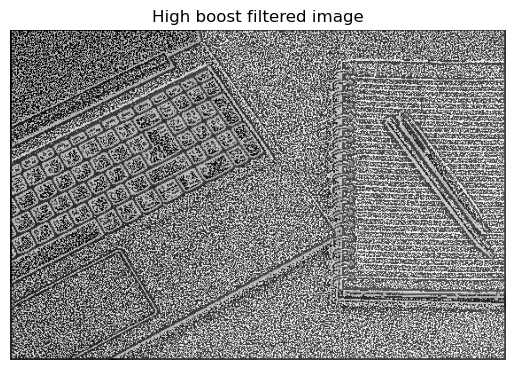

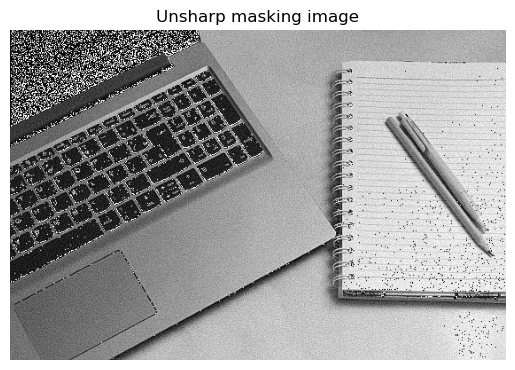

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blur_image(image, filter_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Calculate the padding required based on the filter size
    padding = filter_size // 2

    # Create a copy of the image to store the blurred result
    blurred_image = np.copy(image)

    # Iterate over each pixel in the image
    for y in range(padding, height - padding):
        for x in range(padding, width - padding):
            # Extract the region of interest (ROI) centered at (x, y)
            roi = image[y - padding:y + padding + 1, x - padding:x + padding + 1]

            # Calculate the average value of the ROI
            average_value = np.mean(roi)

            # Set the corresponding pixel in the blurred image to the average value
            blurred_image[y, x] = average_value

    return blurred_image

def high_boost_filtering(image, blurred_image, amplification_factor):
    
    high_pass = image-blurred_image
    sharpened_image = image + (high_pass*amplification_factor)
    np.clip(sharpened_image,0,255).astype(np.uint8)
    
    return sharpened_image
    
def show_images(img,name):
    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()
    

def main():
    image = cv2.imread('study.png',cv2.IMREAD_GRAYSCALE)
    blurred_image1 = blur_image(image,5)
    high_boost_filtered_image1 = high_boost_filtering(image, blurred_image1,2.5)
    unsharp_masking_image1 = high_boost_filtering(image, blurred_image1,1)
    
    
    show_images(image,'Original Image')
    show_images(blurred_image1,'Blurred Image with averaging in a 5*5 neighbourhood')
    show_images(high_boost_filtered_image1,'High boost filtered image')
    show_images(unsharp_masking_image1,'Unsharp masking image')
    
    
    blurred_image2 = blur_image(image,3)
    high_boost_filtered_image2 = high_boost_filtering(image, blurred_image2,2.5)
    unsharp_masking_image2 = high_boost_filtering(image, blurred_image2,1)
    
    show_images(blurred_image2,'Blurred Image with averaging in a 3*3 neighbourhood')
    show_images(high_boost_filtered_image1,'High boost filtered image')
    show_images(unsharp_masking_image2,'Unsharp masking image')

    return 1

if __name__ == '__main__':
    main()